## Анализ нападения ВОЛКОВ с помощью seaborn, wordcloud и pandas. ##
(Все данные в датасете официальны. Информация взята с kaggle и Wikipedia)

Цели исследования:
1. Классифицировать нападения;
2. Узнать причину частейших нападений волков на людей;
3. Выяснить при каких обстоятельствах происходят нападения.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv("global_wolves.csv")

df.head()

,Victims,Date,Type of attack,Location,Notes
0,"Martino Raineri, male","January 17, 2022",Unprovoked,"Between Malga Seconda Posta and Forte Cherle, ...","Seven wolves killed a man's dog, who was skiin..."
1,"Stanley Russ, 72, male","May 29, 2020",Unprovoked,"Port Edward, British Columbia, Canada",A wolf attacked a man and bit his legs and arm.
2,Vlastimil Vejrosta and his wife,"April 30, 2020",Predatory,"Božanov, Czech Republic",Three wolves attempted to surround a couple ne...
3,"Timur Makhametov, 23, male","December 30, 2019",Predatory,"Ketpen Village, Uighur District, Almaty Region...",A wolf attacked a young man who was getting wa...
4,"Unknown, adult, male","December 12, 2019",Rabid,"Tariat District, Arkhangai Province, Mongolia",A wolf bit a shepherd's hand outside his home.


In [3]:
df.describe()

,Victims,Date,Type of attack,Location,Notes
count,462,462,438,462,388
unique,417,437,8,420,376
top,"Unknown, adult, female",1896–1897,Predatory,"Malbosc, France",A wolf killed and partially ate a boy.
freq,8,5,313,6,3


In [4]:
types_of_attack = np.array(df["Type of attack"])
types_of_attask = types_of_attack.nonzero


rabids = 0
predatories = 0
unprovokeds = 0
other = 0

for t in types_of_attack:
    if t == "Rabid":
        rabids += 1
    elif t == "Predatory":
        predatories += 1
    elif t == "Unprovoked":
        unprovokeds += 1
    else:
        other += 1

types_of_attack_array = np.array([[rabids],
                                  [predatories],
                                  [unprovokeds],
                                  [other]]).transpose()

types_of_attack_dataframe = pd.DataFrame(types_of_attack_array)
types_of_attack_dataframe.columns=["Бешеные", "Хищные", "Неспровоцированные", "Прочие"]

types_of_attack_dataframe

,Бешеные,Хищные,Неспровоцированные,Прочие
0,60,313,49,40


In [5]:
maximum_attacks = np.max(types_of_attack_array)

print(f"Максимум нападений: {maximum_attacks}. Причина самых частых нападений: Хищность.")

Максимум нападений: 313. Причина самых частых нападений: Хищность.


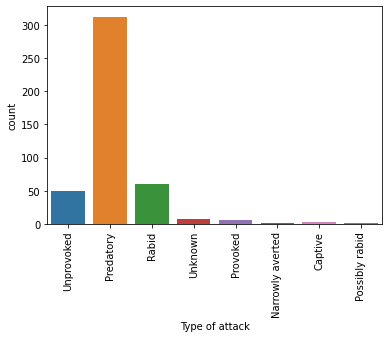

In [6]:
ax = sns.countplot(x="Type of attack", data=df)
ax.tick_params(axis='x', rotation=90)

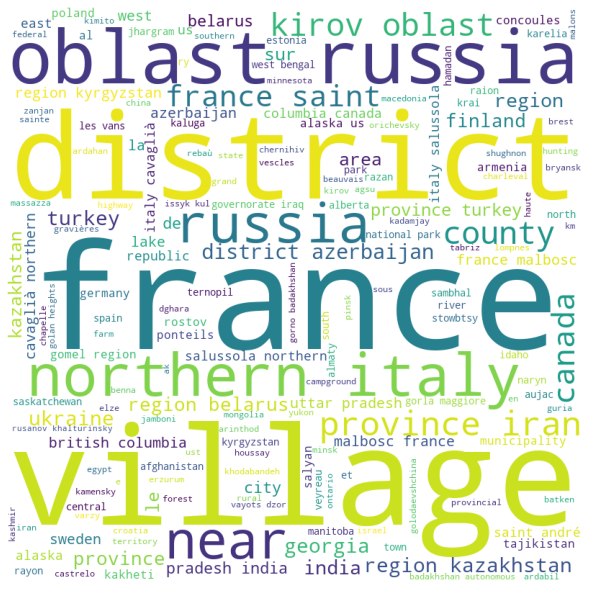

In [7]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in df.Location:
    val = str(val)

    tokens = val.split()

    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


## Итог ##
1. Самые частые нападения волков происходят из-за **бешенства**, **хищных намерений** или из-за **неправоцирующих факторов**.
2. Больше всего нападений происходит со стороны **ХИЩНЫХ** волков.
3. Нападения волков чаще всего происходят во **Франции**, **Северной Италии** и **России**. Нападения преобладают в **деревнях**, **областях России** и в **провинциях**. 